In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
Label_Encoder = LabelEncoder()

In [2]:
data = pd.read_csv('loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.drop('Loan_ID',axis=1,inplace=True)

In [5]:
data.dtypes == 'object'

Gender                True
Married               True
Dependents           False
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area         True
Loan_Status           True
dtype: bool

In [6]:
# نشان دادن value ها و مقدار هاشون در جدول مدنظر
data['Gender'].value_counts()

Gender
Male      487
Female    111
Name: count, dtype: int64

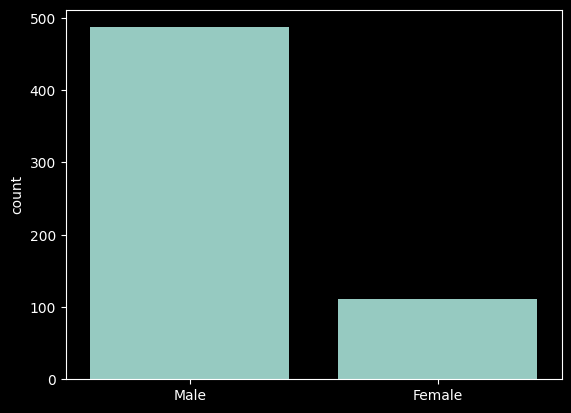

In [7]:
plt.close()
sns.barplot(x=list(data['Gender'].value_counts().index),y=data['Gender'].value_counts())
plt.show()

In [8]:
data['Gender'] = Label_Encoder.fit_transform(data['Gender'])
data['Married'] = Label_Encoder.fit_transform(data['Married'])
data['Education'] = Label_Encoder.fit_transform(data['Education'])
data['Self_Employed'] = Label_Encoder.fit_transform(data['Self_Employed'])
data['Property_Area'] = Label_Encoder.fit_transform(data['Property_Area'])
data['Loan_Status'] = Label_Encoder.fit_transform(data['Loan_Status'])

In [9]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


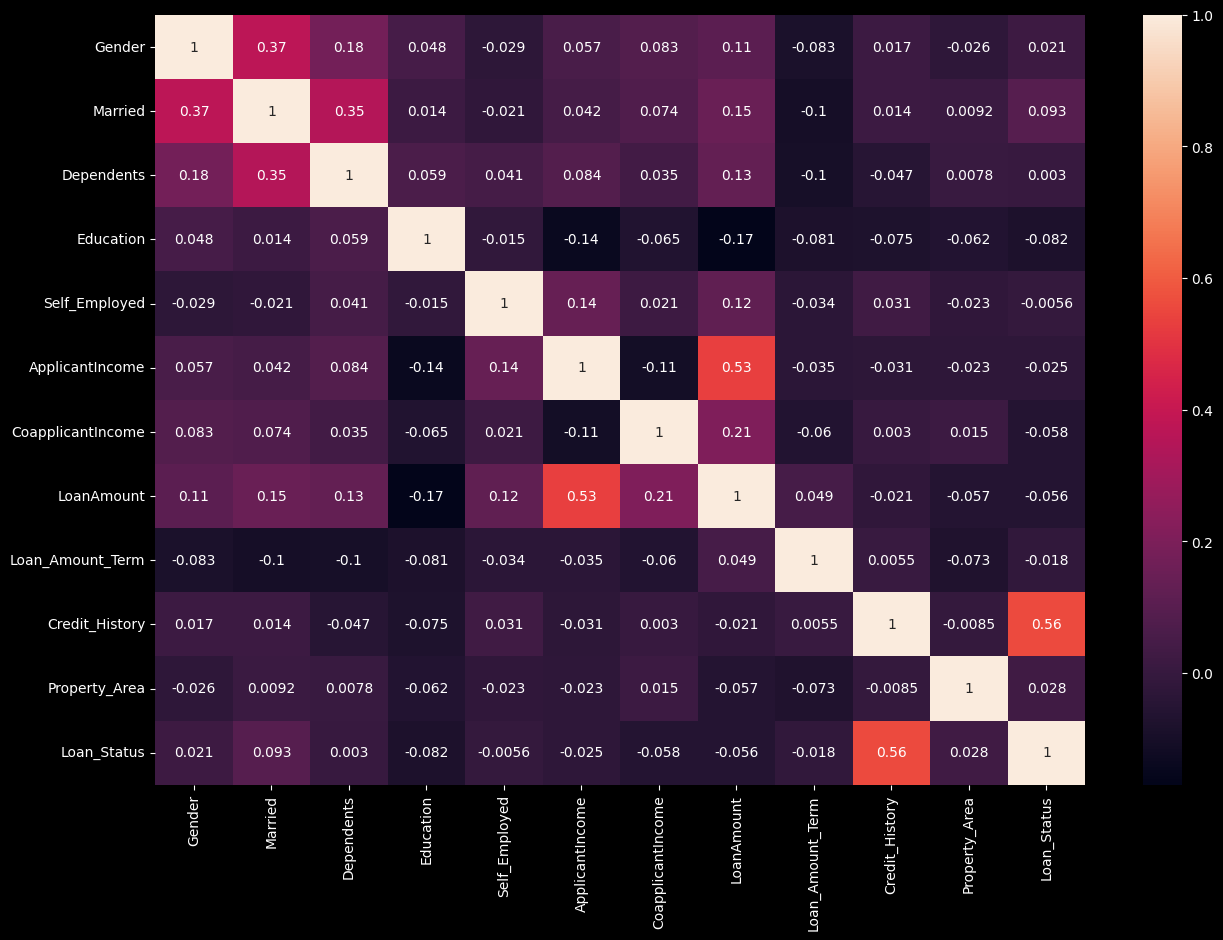

In [10]:
plt.close()
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [11]:
data.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())

data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
model = LogisticRegression(max_iter=10000)

x = data.drop('Loan_Status',axis=1)
y = data.Loan_Status

X_train,X_test,y_train,y_test = train_test_split(x,y , test_size=0.2, random_state=42)

model.fit(X_train,y_train)

out = model.predict(X_test)

In [14]:
print(out)
print()
print(y_test)

[0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1]

110    0
287    0
563    1
77     0
181    1
      ..
398    1
433    1
148    1
493    1
438    0
Name: Loan_Status, Length: 120, dtype: int32


In [15]:
print(metrics.accuracy_score(y_test,out) * 100,'%')

82.5 %
